In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
import sklearn.svm
from scipy.spatial.distance import cdist
from collections import Counter
from functools import partial
import os

In [2]:
matdata = loadmat('Data/Lab 5/ex5data1.mat')
X = matdata['X']
Y = np.hstack(matdata['y'])

print(X.shape, Y.shape)

(51, 2) (51,)


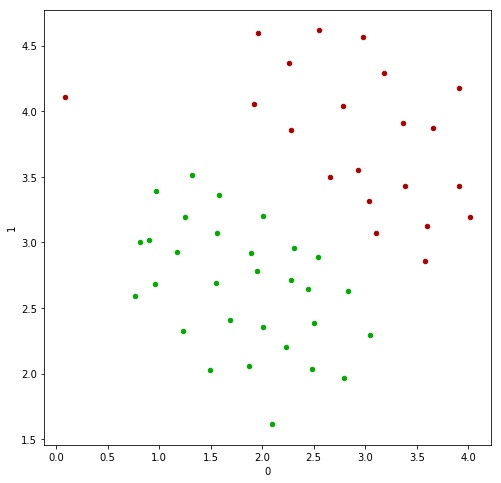

In [3]:
fig, ax = plt.subplots(1, 1, figsize=(8,8))
df = pd.DataFrame(np.concatenate((X, np.vstack(Y)), axis=1))
df.where(df[2] == 1).plot.scatter(x=0, y=1, c='#aa0000', ax=ax)
df.where(df[2] == 0).plot.scatter(x=0, y=1, c='#00aa00', ax=ax)

/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


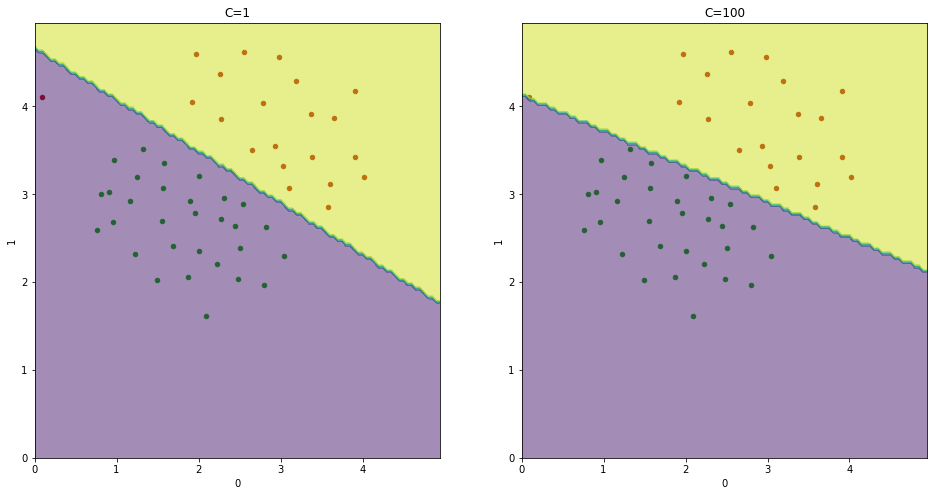

In [4]:
fig, ax = plt.subplots(1, 2, figsize=(16,8))
xx, yy = np.meshgrid(
    np.arange(0, 5, 0.05), 
    np.arange(0, 5, 0.05))

def _plot(ax, C):
    df.where(df[2] == 1).plot.scatter(x=0, y=1, c='#aa0000', ax=ax)
    df.where(df[2] == 0).plot.scatter(x=0, y=1, c='#00aa00', ax=ax)
    clf = sklearn.svm.LinearSVC(C=C)
    clf.fit(X, Y)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.5)
    ax.set_title(f'C={C}')

_plot(ax[0], C=1)
_plot(ax[1], C=100)

# PART 2

In [5]:
matdata = loadmat('Data/Lab 5/ex5data2.mat')

X = matdata['X']
Y = np.hstack(matdata['y'])

SIGMA = 0.05

In [6]:
def gaussian_kernel(x1, x2, σ=SIGMA):
    dists = cdist(x1, x2, metric='sqeuclidean')
    return np.exp(-0.5 * dists / σ**2)

In [7]:
partial
clf = sklearn.svm.SVC(C=1, kernel=gaussian_kernel)
clf.fit(X, Y)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel=<function gaussian_kernel at 0x117b46f80>, max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

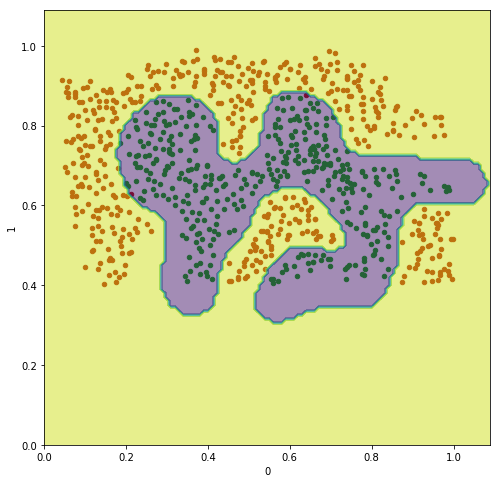

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(8,8))
df = pd.DataFrame(np.concatenate((X, np.vstack(Y)), axis=1))
xx, yy = np.meshgrid(
    np.arange(0, 1.1, 0.01), 
    np.arange(0, 1.1, 0.01))

df.where(df[2] == 1).plot.scatter(x=0, y=1, c='#aa0000', ax=ax)
df.where(df[2] == 0).plot.scatter(x=0, y=1, c='#00aa00', ax=ax)

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
ax.contourf(xx, yy, Z, alpha=0.5)

# PART 3

In [9]:
matdata = loadmat('Data/Lab 5/ex5data3.mat')

X = matdata['X']
Y = np.hstack(matdata['y'])
print(X.shape, Y.shape)

print('Val: ')
X_VAL = matdata['Xval']
Y_VAL = np.hstack(matdata['yval'])
print(X_VAL.shape, Y_VAL.shape)

(211, 2) (211,)
Val: 
(200, 2) (200,)


In [10]:
from functools import partial

def gaussian_kernel(x1, x2, σ=SIGMA):
    dists = cdist(x1, x2, metric='sqeuclidean')
    return np.exp(-0.5 * dists / σ**2)

C = 1; σ = 0.1
0.965


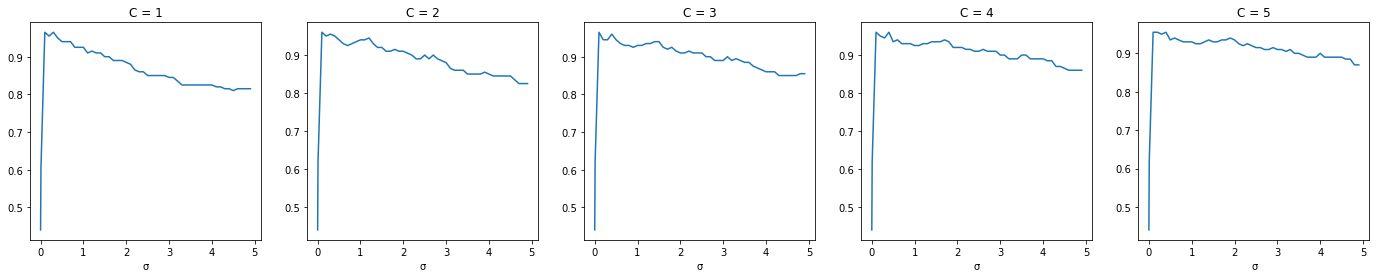

In [11]:
from itertools import product

def _fit(x, y, x_val, y_val, *, C, σ):
    kernel = partial(gaussian_kernel, σ=σ)
    clf = sklearn.svm.SVC(C=C, kernel=kernel)
    clf.fit(x, y)
    return (clf.predict(x_val) == y_val).mean()

C_values = np.array([1, 2, 3, 4, 5])
σ_values = np.concatenate((np.array([0.001, 0.01]), np.arange(0.1, 5, 0.1)))
accs = np.array([
    [_fit(X, Y, X_VAL, Y_VAL, C=C, σ=σ)  for σ in σ_values] 
    for C in C_values])

_, ax = plt.subplots(1, 5, figsize=(24, 4))
for axi, C, acc in zip(ax, C_values, accs):
    axi.plot(σ_values, acc)
    axi.set_title(f'C = {C}')
    axi.set_xlabel('σ')

i_C, i_σ = np.unravel_index(accs.argmax(), accs.shape)
print(f'C = {C_values[i_C]}; σ = {σ_values[i_σ]}')
print(f'{accs[i_C, i_σ]}')

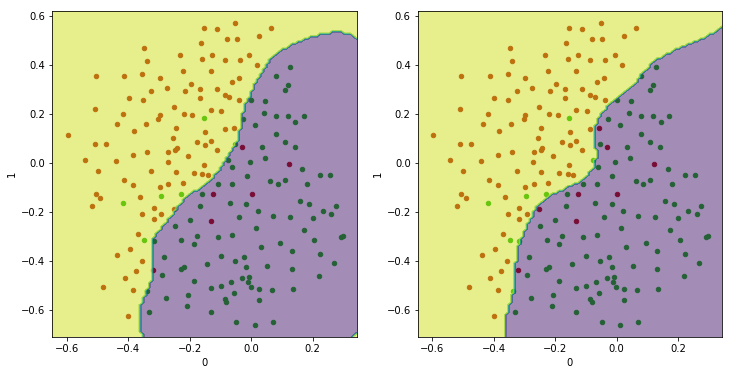

In [12]:
fig, ax = plt.subplots(1, 2, figsize=(12,6))
C, σ = C_values[i_C], σ_values[i_σ]
                            
def _plot(ax, *, x, y, C, σ):
    kernel = partial(gaussian_kernel, σ=σ)
    clf = sklearn.svm.SVC(C=C, kernel=kernel)
    clf.fit(x, y)

    df = pd.DataFrame(np.concatenate((X, np.vstack(Y)), axis=1))
    df.where(df[2] == 1).plot.scatter(x=0, y=1, c='#aa0000', ax=ax)
    df.where(df[2] == 0).plot.scatter(x=0, y=1, c='#00aa00', ax=ax)

    xx, yy = np.meshgrid(
        np.arange(np.min(X[:, 0]) - 0.05, np.max(X[:, 0]) + 0.05, 0.01), 
        np.arange(np.min(X[:, 1]) - 0.05, np.max(X[:, 1]) + 0.05, 0.01))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.5)

_plot(ax[0], x=X, y=Y, C=C, σ=σ)
_plot(ax[1], x=X_VAL, y=Y_VAL, C=C, σ=σ)

# PART 4

In [13]:
matdata = loadmat('Data/Lab 5/spamTrain.mat')
X = matdata['X']
Y = np.hstack(matdata['y'])
print(X.shape, Y.shape)
_, N = X.shape
matdata = loadmat('Data/Lab 5/spamTest.mat')
X_TEST = matdata['Xtest']
Y_TEST = np.hstack(matdata['ytest'])
print(X_TEST.shape, Y_TEST.shape)

C, SIGMA = 50, 9

(4000, 1899) (4000,)
(1000, 1899) (1000,)


In [14]:
def gaussian_kernel(x1, x2, σ=SIGMA):
    dists = cdist(x1, x2, metric='sqeuclidean')
    return np.exp(-0.5 * dists / σ**2)

Train: C = 25; σ = 1.0
Train: 1.0
CPU times: user 25min 30s, sys: 10.2 s, total: 25min 40s
Wall time: 25min 53s


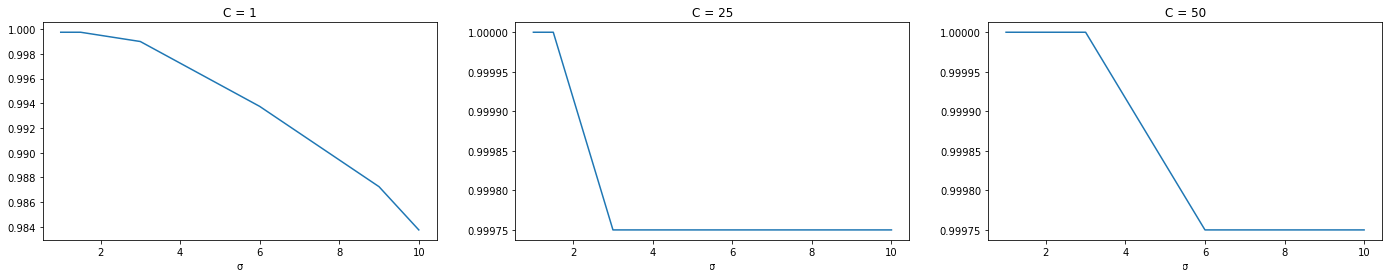

In [15]:
%%time

def _fit(x, y, *, C, σ):
    kernel = partial(gaussian_kernel, σ=σ)
    clf = sklearn.svm.SVC(C=C, kernel=kernel)
    clf.fit(x, y)
    return (clf.predict(x) == y).mean()

C_values = np.array([1, 25, 50])
σ_values = np.array([1, 1.5, 3, 6, 9, 10])
accs = np.array([
    [_fit(X, Y, C=C, σ=σ) for σ in σ_values] 
    for C in C_values])

_, ax = plt.subplots(1, 3, figsize=(24, 4))
for axi, C, acc in zip(ax, C_values, accs):
    axi.plot(σ_values, acc)
    axi.set_title(f'C = {C}')
    axi.set_xlabel('σ')

i_C, i_σ = np.unravel_index(accs.argmax(), accs.shape)
print(f'Train: C = {C_values[i_C]}; σ = {σ_values[i_σ]}')
print(f'Train: {accs[i_C, i_σ]}')

kernel = partial(gaussian_kernel, σ=σ_values[i_σ])
clf = sklearn.svm.SVC(C=C_values[i_C], kernel=kernel).fit(X, Y)
(clf.predict(X_TEST) == Y_TEST).mean()

In [16]:
(clf.predict(X_TEST) == Y_TEST).mean()

0.814

In [17]:
from collections import defaultdict
TO_CODE = defaultdict(lambda: None)
TO_WORD = defaultdict(lambda: None)
with open('Data/Lab 5/vocab.txt') as vocab_file:
    for line in vocab_file.readlines():
        code, word = line.split('\t')
        word = word.strip()
        code = int(code)
        TO_WORD[code] = word
        TO_CODE[word] = code
    
print(len(TO_WORD))
    
with open('Data/Lab 5/emailSample1.txt') as f:
    EMAIL_1 = f.read()
with open('Data/Lab 5/emailSample2.txt') as f:
    EMAIL_2 = f.read()
with open('Data/Lab 5/spamSample1.txt') as f:
    SPAM_1 = f.read()
with open('Data/Lab 5/spamSample2.txt') as f:
    SPAM_2 = f.read()

1899


In [18]:
import re
import nltk
from nltk.stem import PorterStemmer
nltk.download('punkt')

re_html = re.compile(r'<.*?>')
re_email = re.compile(r'([a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+)')
re_url = re.compile(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\), ]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
re_number = re.compile(r'[-+]0\d*.\d+|\d+')
re_waste = re.compile(r'>|\?|,|!|\'|\.|:|-|\(|\)|\\|&|\+|%|\*|\[|\]|;|/')


def prepare_text(text):
    text = text.lower()
    text = re.sub(re_email, 'emailaddr', text)
    text = re.sub(re_url, 'httpaddr', text)
    text = re.sub(re_number, 'number', text)
    text = re.sub(re_waste, '', text)
    words = nltk.word_tokenize(text)
    return [prepare_word(word) for word in words]


def prepare_word(word):    
    if word == '$':
        return 'dollar'
    
    try:
        number = float(word)
        return "number"
    except ValueError: pass
    
    porter = PorterStemmer()
    word = porter.stem(word)
    return word


def get_x(prepared_words, to_code=TO_CODE, n=N):
    x = np.zeros(n)
    stat = Counter([
        to_code[word] for word in prepared_words 
        if to_code[word] is not None])
    for idx, val in stat.items():
        x[idx-1] = val
    return x

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/vadimdenisov/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [19]:
for text in EMAIL_1, EMAIL_2, SPAM_1, SPAM_1:
    words = prepare_text(text)
    x = get_x(words)
    print(clf.predict([x]))

[0]
[0]
[0]
[0]


In [20]:
for spam_path in sorted(os.listdir('Data/Lab 5/spam')):
    path = os.path.join('Data/Lab 5/spam', spam_path)
    with open(path, 'rb') as spam_file:
        btext = spam_file.read()
        text = btext.decode('utf-8',errors='ignore')
        words = prepare_text(text)
        x = get_x(words)
        print(f"{path} --> {clf.predict([x])}")   

Data/Lab 5/spam/00034.cac95512308c52cfba33258e46feff97 --> [0]
Data/Lab 5/spam/00035.bd7183c238b884a153ad4888fbee9bf6 --> [0]
Data/Lab 5/spam/00036.5b5e714c8d5b1050a392e55c42070f2c --> [0]
Data/Lab 5/spam/00037.c7f0ce13d4cad8202f3d1a02b5cc5a1d --> [0]


In [21]:
my_vocab = set()
for spam_path in sorted(os.listdir('Data/Lab 5/spam')):
    path = os.path.join('Data/Lab 5/spam', spam_path)
    with open(path, 'rb') as spam_file:
        btext = spam_file.read()
        text = btext.decode('utf-8',errors='ignore')
        words = prepare_text(text)
        [my_vocab.add(word) for word in words]
MY_TO_WORD = defaultdict(lambda: None, enumerate(sorted(my_vocab), 1))
MY_TO_CODE = defaultdict(
    lambda: None, [
        (word, i) 
        for i, word in enumerate(sorted(my_vocab), 1)
])

In [22]:
MY_X = []
for spam_path in sorted(os.listdir('Data/Lab 5/spam')):
    path = os.path.join('Data/Lab 5/spam', spam_path)
    with open(path, 'rb') as spam_file:
        btext = spam_file.read()
        text = btext.decode('utf-8',errors='ignore')
        words = prepare_text(text)
        x = get_x(words, to_code=MY_TO_CODE)
        MY_X.append(x)

MY_X = np.array(MY_X)
MY_Y = np.array([1,1,1,1])